In [118]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

In [119]:
excel_data_df = pd.ExcelFile(r'../data/egg.xlsx')
excel_data_df = excel_data_df.parse(excel_data_df.sheet_names[0])

In [120]:
result_df = pd.ExcelFile(r'../data/egg-result.xlsx')
result_df = result_df.parse(result_df.sheet_names[0])
result_set = result_df.iloc[:, 1].tolist()

In [121]:
for idx, header in enumerate(excel_data_df.columns.tolist()):
    print(idx, header)

0 Dấu thời gian
1 Địa chỉ email
2 Số báo danh của bạn (Sử dụng SBD đã được gửi qua email)
3 Mục tiêu của bạn khi tham gia vào câu lạc bộ EGG? (Tối thiểu số lựa chọn để tối ưu hóa mục tiêu bạn nhé)
4 Nếu được vào câu lạc bộ và vượt qua các khóa training, tương lai bạn muốn trở thành ai?
5 Tại sao bạn lại chọn nguyện vọng như trên? Bạn có những thế mạnh gì tương ứng nguyện vọng đã chọn. (Câu hỏi này rất quan trọng, hãy thể hiện nhiều nhất có thể nhé)
6 Liệt kê các thành tích nổi bật của em (nếu có)
7 Bạn có thể dành bao nhiêu thời gian cho các hoạt động chung của câu lạc bộ?
8 Bạn có thể dành bao nhiêu thời gian để làm bài tập trong các hoạt động training kiến thức?
9 Bạn có kỹ năng đặc biệt nào khác không?
10 Bạn có mong muốn chia sẻ kiến thức cho cộng đồng không? Đối với các hoạt động được chia sẻ trên fanpage EGG, nếu bạn là một thành viên câu lạc bộ, bạn sẽ cải tiến nó như thế nào để mang lại nhiều giá trị hơn cho cộng đồng IT?


In [122]:
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Nhân sự")]
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Đối ngoại")]
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Chuyên môn")]
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Hậu cần")]
# excel_data_df = excel_data_df[(excel_data_df["11. Bạn mong muốn tham gia vào ban"] == "Truyền thông")]
excel_data_df.reset_index(drop=True, inplace=True)
excel_data_df.fillna("", inplace = True)
# filter = [0, 1, 5, 7, 9, 11, 14, 15, 16, 17, 18, 19, 22, 23, 24, 26, 28, 30, 31, 33, 34, 35, 36, 37, 40, 41, 43, 44, 45, 52, 53, 55, 58, 60, 61, 65, 68, 69, 74, 77, 84, 86, 87, 88, 89, 96, 97, 98, 102, 104, 106, 107, 108, 110, 111, 112, 113, 114, 116, 117, 120, 127, 129, 134, 135, 137, 138, 139, 140, 140, 142, 145, 146, 149, 152, 154, 155]
# excel_data_df = excel_data_df.iloc[filter]
# excel_data_df.reset_index(drop=True, inplace=True)
# identity = list(excel_data_df.index.values)
identity = excel_data_df.iloc[:, 1].tolist()

In [123]:
import sys; sys.path.insert(0, '..')
from app.loader import loader
from app.ssmc_fcm import SSMC_FCM

In [124]:
fields_chosen = {
    # egg data
    3: (loader.multilabel_binarizing, 1),
    4: (loader.multilabel_binarizing, 1),
    5: (loader.feature_engineering, 1),
    6: (loader.feature_engineering, 1),
    7: (loader.multilabel_binarizing, 1),
    8: (loader.multilabel_binarizing, 1),
    9: (loader.multilabel_binarizing, 1),
    10: (loader.feature_engineering, 1),

    # # nha data BCM
    # 40: (loader.feature_engineering, 1),
    # 43: (loader.feature_engineering, 1),
    # 46: (loader.feature_engineering, 1),
    # 49: (loader.feature_engineering, 1),
    # 55: (loader.feature_engineering, 1),
    # 58: (loader.feature_engineering, 1),

    # # nha data BCT
    # 41: (loader.feature_engineering, 1),
    # 44: (loader.feature_engineering, 1),
    # 47: (loader.feature_engineering, 1),
    # 50: (loader.feature_engineering, 1),
    # 62: (loader.feature_engineering, 1),
    # 65: (loader.feature_engineering, 1),
    # 68: (loader.feature_engineering, 1),
    # 71: (loader.feature_engineering, 1),

    # # nha data BDN
    # 41: (loader.feature_engineering, 1),
    # 44: (loader.feature_engineering, 1),
    # 47: (loader.feature_engineering, 1),
    # 50: (loader.feature_engineering, 1),
    # 74: (loader.feature_engineering, 1),
    # 77: (loader.feature_engineering, 1),
    # 80: (loader.feature_engineering, 1),

    # # sinno data nhan su
    # 10: (loader.feature_engineering, 1),
    # 18: (loader.feature_engineering, 1),
    # 19: (loader.feature_engineering, 1),
    # 20: (loader.multilabel_binarizing, 1),
    # 21: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),

    # # sinno data doi ngoai
    # 10: (loader.feature_engineering, 1),
    # 29: (loader.feature_engineering, 1),
    # 30: (loader.feature_engineering, 1),
    # 31: (loader.feature_engineering, 1),
    # 32: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),

    # # sinno data chuyen mon
    # 10: (loader.feature_engineering, 1),
    # 13: (loader.feature_engineering, 1),
    # 14: (loader.feature_engineering, 1),
    # 15: (loader.feature_engineering, 1),
    # 16: (loader.feature_engineering, 1),
    # 17: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),

    # # sinno data hau can
    # 10: (loader.feature_engineering, 1),
    # 33: (loader.feature_engineering, 1),
    # 39: (loader.feature_engineering, 1),
    # 40: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),

    # # sinno data truyen thong
    # 10: (loader.feature_engineering, 1),
    # 22: (loader.feature_engineering, 1),
    # 23: (loader.feature_engineering, 1),
    # 24: (loader.feature_engineering, 1),
    # 25: (loader.feature_engineering, 1),
    # 26: (loader.feature_engineering, 1),
    # 34: (loader.multilabel_binarizing, 1),
    # 35: (loader.feature_engineering, 1),
    # 36: (loader.feature_engineering, 1),
    # 37: (loader.feature_engineering, 1),
    # 38: (loader.feature_engineering, 1),
}

In [125]:
from datetime import datetime
vectors = {}
for id_field, config in fields_chosen.items():
    start = datetime.now()
    func = config[0]
    raw_data = excel_data_df.iloc[:, id_field].tolist()
    data = func(raw_data)
    vectors[id_field] = data
    print(f"{round(100 * (list(fields_chosen).index(id_field) + 1) / len(fields_chosen), 2)}% ({datetime.now() - start})")

12.5% (0:00:00.000976)
25.0% (0:00:00.000831)
37.5% (0:00:10.447717)
50.0% (0:00:06.055999)
62.5% (0:00:00.000736)
75.0% (0:00:00.000396)
87.5% (0:00:00.000396)
100.0% (0:00:08.140657)


In [126]:
cluster_fields = list(fields_chosen.keys())
dataset = None
data_field_len = []
data_field_weight = []
for idx, id_field in enumerate(cluster_fields):
    data = np.array(vectors[id_field])
    dataset = data if idx == 0 else np.hstack((dataset, data))
    data_field_len.append(data.shape[1])
    data_field_weight.append(fields_chosen[id_field][1])
dataset.shape, data_field_len, data_field_weight

((158, 2461), [89, 7, 768, 768, 10, 4, 47, 768], [1, 1, 1, 1, 1, 1, 1, 1])

Supervised percentage: 0.0% (0:158)
Cluster members: 
[]
['leducdientin92018@gmail.com', 'trinhdung01000100@gmail.com', 'tuannguyen2004zx@gmail.com', 'nphuochai4@gmail.com', 'thongphil18@gmail.com', 'lanphuong251064@gmail.com', 'chientrungha2004@gmail.com', 'nguyenbaolinh1925@hotmail.com', 'hoan8e1@gmail.com', 'kimduyminh2124@gmail.com', 'nguyentuandatk16a@gmail.com', 'huypham261203@gmail.com', 'nguyentatcuong251204@gmail.com', 'buivankienvx@gmail.com', 'nhhoang12122004@gmail.com', 'quannm8904@gmail.com', 'damtoan321@gmail.com', 'mcminhduc2004@gmail.com', 'vietbui2k3@gmail.com', 'phamquanghuy060304@gmail.com', 'vuduc477a6@gmail.com', 'hieu04022004@gmail.com', 'nguyenbindeptrai123@gmail.com', 'nguyenvanhung13122001@gmail.com', 'vucuong6204nb@gmail.com', 'huyhoang2001037a1@gmail.com', 'thanh8cute@gmail.com', 'm.nghia10802k4@gmail.com', 'vuloc34hd@gmail.com', 'hoangtuathat@gmail.com', 'Kimbaobao1223@gmail.com', 'gianghoangtruong1111@gmail.com', 'Bao.HB226015@sis.hust.edu.vn', 'phamnguyenp

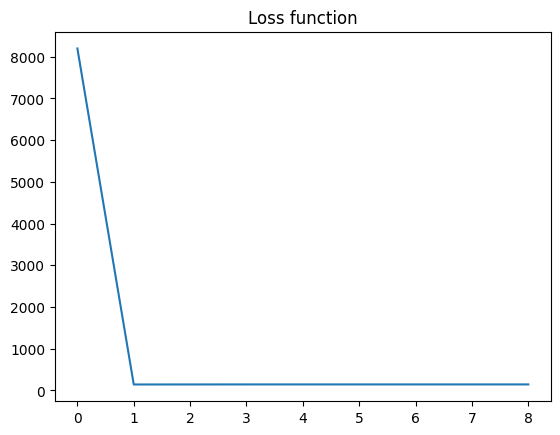

loss functions: 
[8197.83570999413, 142.58857575179775, 143.3586750331773, 143.73243202414926, 143.80785511451745, 143.82370778361593, 143.82689517781066, 143.82752226446183, 143.82765364939567]


In [127]:
supervised_set = [
    [
        
    ]
]
ssmc_fcm = SSMC_FCM(
    dataset=dataset, 
    fields_len=data_field_len, 
    fields_weight=[1, 1, 1, 1, 1, 1, 1, 1],
    n_clusters=5, 
    identity=identity,
    supervised_set=supervised_set, 
)
ssmc_fcm.clustering()
ssmc_fcm.show_cluster_members()
ssmc_fcm.show_loss_function()

In [128]:
identity_mapping = {iden: idx for idx, iden in enumerate(identity)}
for cluster in ssmc_fcm.pred_labels:
    count = sum([cluster.count(x) for x in result_set])
    print(f"Accuracy: {round(100 * count / len(result_set), 2)}% ({count} in {len(cluster)} of {len(ssmc_fcm.dataset)})")
    # print([identity.index(i) for i in cluster])
    # display(excel_data_df.loc[[identity.index(i) for i in cluster]].iloc[:, [1, *cluster_fields]])

Accuracy: 0.0% (0 in 0 of 158)
Accuracy: 30.0% (12 in 80 of 158)
Accuracy: 25.0% (10 in 35 of 158)
Accuracy: 2.5% (1 in 3 of 158)
Accuracy: 32.5% (13 in 40 of 158)


In [129]:
identity_mapping = {iden: idx for idx, iden in enumerate(identity)}
for i in range(len(cluster_fields)):
    __weight = [0] * len(cluster_fields)
    __weight[i] = 1
    ssmc_fcm = SSMC_FCM(
        dataset=dataset, 
        fields_len=data_field_len, 
        fields_weight=__weight,
        n_clusters=5, 
        identity=identity,
        supervised_set=supervised_set, 
    )
    ssmc_fcm.clustering()
    print(__weight, i)
    for cluster in ssmc_fcm.pred_labels:
        count = sum([cluster.count(x) for x in result_set])
        print(f"Accuracy: {round(100 * count / len(result_set), 2)}% ({count} in {len(cluster)} of {len(ssmc_fcm.dataset)})")
    print()

[1, 0, 0, 0, 0, 0, 0, 0] 0
Accuracy: 25.0% (10 in 59 of 158)
Accuracy: 7.5% (3 in 7 of 158)
Accuracy: 0.0% (0 in 0 of 158)
Accuracy: 2.5% (1 in 1 of 158)
Accuracy: 55.0% (22 in 91 of 158)

[0, 1, 0, 0, 0, 0, 0, 0] 1
Accuracy: 0.0% (0 in 4 of 158)
Accuracy: 35.0% (14 in 77 of 158)
Accuracy: 35.0% (14 in 53 of 158)
Accuracy: 20.0% (8 in 21 of 158)
Accuracy: 0.0% (0 in 3 of 158)

[0, 0, 1, 0, 0, 0, 0, 0] 2
Accuracy: 50.0% (20 in 71 of 158)
Accuracy: 0.0% (0 in 0 of 158)
Accuracy: 0.0% (0 in 1 of 158)
Accuracy: 37.5% (15 in 83 of 158)
Accuracy: 2.5% (1 in 3 of 158)

[0, 0, 0, 1, 0, 0, 0, 0] 3
Accuracy: 47.5% (19 in 52 of 158)
Accuracy: 12.5% (5 in 64 of 158)
Accuracy: 15.0% (6 in 31 of 158)
Accuracy: 7.5% (3 in 6 of 158)
Accuracy: 7.5% (3 in 5 of 158)

[0, 0, 0, 0, 1, 0, 0, 0] 4
Accuracy: 35.0% (14 in 53 of 158)
Accuracy: 37.5% (15 in 68 of 158)
Accuracy: 2.5% (1 in 7 of 158)
Accuracy: 15.0% (6 in 30 of 158)
Accuracy: 0.0% (0 in 0 of 158)

[0, 0, 0, 0, 0, 1, 0, 0] 5
Accuracy: 40.0% (16 in 